In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import pandas as pd

In [2]:
img_size = 256
batch_size = 32

### Load the data

In [3]:
# df = pd.read_csv("data/HAM10000_metadata.csv")
# df["image_id"] = df["image_id"].apply(lambda string: int(string[5:]))

# # not sure if "vasc" is malignant or not, but after looking up the different types of lesions
# # it seems like "akiec", "bcc" and "mel" are malignant and the others are benign
# df["label"] = df["dx"].apply(lambda dx: "malignant" if dx in ["akiec", "bcc", "mel"] else "benign") 

# training_df = df[df["image_id"] < 32306]
# testing_df = df[df["image_id"] >= 32306]

# training_df["image_id"] = training_df["image_id"].apply(lambda id: f"ISIC_00{id}.jpg")
# testing_df["image_id"] = testing_df["image_id"].apply(lambda id: f"ISIC_00{id}.jpg")

# training_df.to_csv("data/training_metadata.csv")
# testing_df.to_csv("data/testing_metadata.csv")

In [3]:
def load_data():
    training_df = pd.read_csv("data/training_metadata.csv")
    testing_df = pd.read_csv("data/testing_metadata.csv")
    
    training_data_generator = ImageDataGenerator(
        rescale=1.0/255,
        validation_split=0.125,
        rotation_range=360,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5, 1.0],
        zoom_range=[0.75, 1.0]
    )
    
    testing_data_generator = ImageDataGenerator(
        rescale=1.0/255
    )
    
    training_data = training_data_generator.flow_from_dataframe(
        dataframe= training_df,
        directory="data/training",
        x_col="image_id",
        y_col="label",
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="binary",
        classes=["benign", "malignant"],
        subset="training",
        shuffle=True
    )

    validation_data = training_data_generator.flow_from_dataframe(
        dataframe=training_df,
        directory="data/training",
        x_col="image_id",
        y_col="label",
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="binary",
        classes=["benign", "malignant"],
        subset="validation",
        shuffle=True
    )

    test_data = testing_data_generator.flow_from_dataframe(
        dataframe=testing_df,
        directory="data/testing",
        x_col="image_id",
        y_col="label",
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="binary",
        classes=["benign", "malignant"]
    )

    return training_data, validation_data, test_data


### Creating the model
Explanation of why the model looks like it does

In [4]:
def create_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

    return model

### Training the model

In [5]:
def train_model(model, training_data, validation_data):
    history = model.fit(training_data, epochs=15, validation_data=validation_data)
    return history

### Evaluate the model

In [6]:
def evaluate_model(model, test_data):
    return None

Comments on the results

In [7]:
def save_model(model, path):
    model.save_weights(path)

### Putting it all together

In [ ]:
model = create_model()
training_data, validation_data, test_data = load_data()
training_result = train_model(model, training_data, validation_data)
# save_model(model, "/models/model_1")

In [8]:
model = create_model()
model.load_weights("./models/model_1")
training_data, validation_data, test_data = load_data()

2022-03-03 23:50:20.582502: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-03 23:50:20.582672: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 7000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.
Found 2015 validated image filenames belonging to 2 classes.


In [21]:
print(training_result.history)

{'loss': [0.8761210441589355, 0.3600882291793823, 0.36630088090896606, 0.3568534851074219, 0.350920170545578, 0.3421679735183716, 0.3431474268436432, 0.33331090211868286, 0.3477310538291931, 0.3356291353702545, 0.3328574597835541, 0.32854875922203064, 0.3208549916744232, 0.3236140310764313, 0.32605215907096863], 'accuracy': [0.7925714254379272, 0.8299999833106995, 0.8118571639060974, 0.8102856874465942, 0.8265714049339294, 0.8418571352958679, 0.8341428637504578, 0.845714271068573, 0.8374285697937012, 0.8411428332328796, 0.8451428413391113, 0.8468571305274963, 0.8511428236961365, 0.8494285345077515, 0.8465714454650879], 'val_loss': [0.6527982950210571, 0.5695208311080933, 0.5323812365531921, 0.6083076596260071, 0.6238216757774353, 0.6204972267150879, 0.6021282076835632, 0.7656345367431641, 0.7565832138061523, 0.6220638155937195, 0.7057570815086365, 0.6970781087875366, 0.6837025284767151, 0.6913937330245972, 0.6959826946258545], 'val_accuracy': [0.35200002789497375, 0.6650000214576721, 0

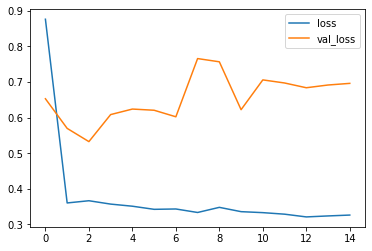

In [22]:
labels = ["loss", "val_loss"]
for label in labels:
    plt.plot(training_result.history[label])
plt.legend(labels)
plt.show()

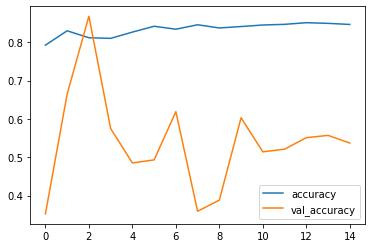

In [23]:
labels = ["accuracy", "val_accuracy"]
for label in labels:
    plt.plot(training_result.history[label])
plt.legend(labels)
plt.show()

In [12]:
predictions = model.predict(test_data)

In [13]:
print(test_data._filepaths[100])
print(predictions[100, 0])

data/testing/ISIC_0033744.jpg
0.5709853
